# Income Bracket 2019

In [3]:
# Dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
from census import Census
from pathlib import Path
import json

In [5]:
# Import U.S. Census API Key
from config import census_key

# Create an instance of the Census library
c = Census(
    census_key,
    year = 2019
)

In [6]:
# Run Census Search to retrieve data on all states (ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19013_001E"),
       
    {'for': 'state:*'}
)

# Convert to DataFrame
Income_Bracket_2019 = pd.DataFrame(census_data)

# Column renaming
Income_Bracket_2019 = Income_Bracket_2019.rename(
    columns = {
        "B19013_001E": "Household Income",
   
        "NAME": "Name"
    }
)


Income_Bracket_2019

,Name,Household Income,state
0,Alabama,50536.0,01
1,Alaska,77640.0,02
2,Arizona,58945.0,04
3,Arkansas,47597.0,05
4,California,75235.0,06
5,Colorado,72331.0,08
6,Delaware,68287.0,10
7,District of Columbia,86420.0,11
8,Connecticut,78444.0,09
9,Florida,55660.0,12


In [7]:
#create Df with selected states
selected_states = ["California", "Texas", "New York", "Florida", "Illinois"]
selected_bracket = Income_Bracket_2019[Income_Bracket_2019["Name"].isin(selected_states)]
selected_bracket

,Name,Household Income,state
4,California,75235.0,06
9,Florida,55660.0,12
13,Illinois,65886.0,17
32,New York,68486.0,36
43,Texas,61874.0,48


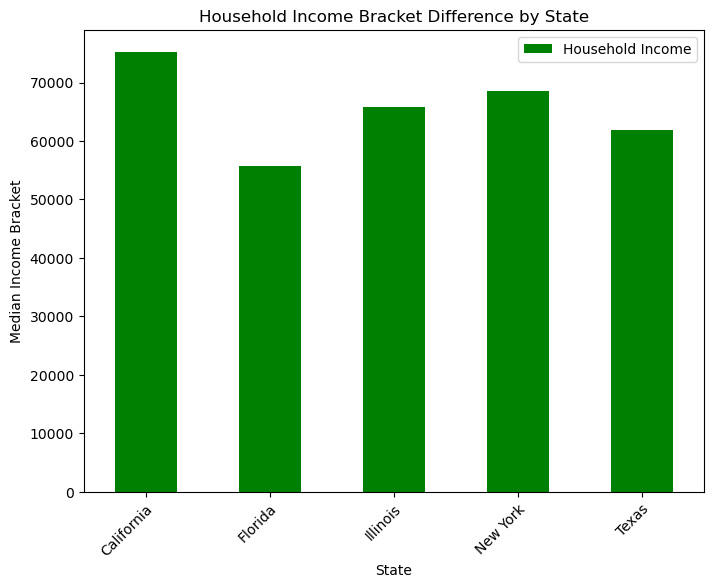

In [8]:
#Create a bar graph for Hosehoud Income for selected states for year 2019
figure7 = selected_bracket.plot(kind="bar", color=["green"], figsize=(8,6),
                           title="Household Income Bracket Difference by State",
                           xlabel="State",
                           ylabel="Median Income Bracket")

figure7.set_xticklabels(selected_bracket['Name'], rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.savefig("output_data/Fig7.png")
plt.show()

In [9]:
#Created CSV file for data frame
Income_Bracket_2019.to_csv("output_data/Income Bracket 2019 Median Household.csv")

In [10]:
# File to Load
#Income_Bracket_2019_to_load = Path("output_data/Income Bracket 2019 Median Household.csv")
Income_Bracket_2020_to_load = Path("output_data/Income Bracket 2020 Median Household.csv")
Income_Bracket_2021_to_load = Path("output_data/Income Bracket 2021 Median Household.csv")
# Read
#Income_Bracket_2019_data = pd.read_csv(Income_Bracket_2019_to_load)
Income_Bracket_2020_data = pd.read_csv(Income_Bracket_2020_to_load)
Income_Bracket_2021_data = pd.read_csv(Income_Bracket_2021_to_load)

# Combine the income data for years 2019 - 2021 into a single dataset. 
Income_Bracket_complete = pd.merge(pd.merge(Income_Bracket_2020_data, Income_Bracket_2021_data,on="Name"), Income_Bracket_2019,on="Name",how='right') 
Income_Bracket_complete.head()

,Unnamed: 0_x,Name,Household Income_x,state_x,Unnamed: 0_y,Household Income_y,state_y,Household Income,state
0,12,Alabama,52035.0,1,0,54943.0,1,50536.0,01
1,6,Alaska,77790.0,2,1,80287.0,2,77640.0,02
2,16,Arizona,61529.0,4,2,65913.0,4,58945.0,04
3,34,Arkansas,49475.0,5,3,52123.0,5,47597.0,05
4,1,California,78672.0,6,4,84097.0,6,75235.0,06


In [11]:
#Rename columns on new data frame
Income_Bracket_complete = Income_Bracket_complete.rename(columns={'Household Income':'Household Income 2019',
                                                                  'Name':'State Name',
                                                                  'Household Income_x':'Household Income 2020',
                                                                  'Household Income_y':'Household Income 2021',
                                                                  })
Income_Bracket_complete

,Unnamed: 0_x,State Name,Household Income 2020,state_x,Unnamed: 0_y,Household Income 2021,state_y,Household Income 2019,state
0,12,Alabama,52035.0,1,0,54943.0,1,50536.0,01
1,6,Alaska,77790.0,2,1,80287.0,2,77640.0,02
2,16,Arizona,61529.0,4,2,65913.0,4,58945.0,04
3,34,Arkansas,49475.0,5,3,52123.0,5,47597.0,05
4,1,California,78672.0,6,4,84097.0,6,75235.0,06
5,28,Colorado,75231.0,8,5,80184.0,8,72331.0,08
6,47,Delaware,69110.0,10,7,72724.0,10,68287.0,10
7,5,District of Columbia,90842.0,11,8,93547.0,11,86420.0,11
8,20,Connecticut,79855.0,9,6,83572.0,9,78444.0,09
9,7,Florida,57703.0,12,9,61777.0,12,55660.0,12


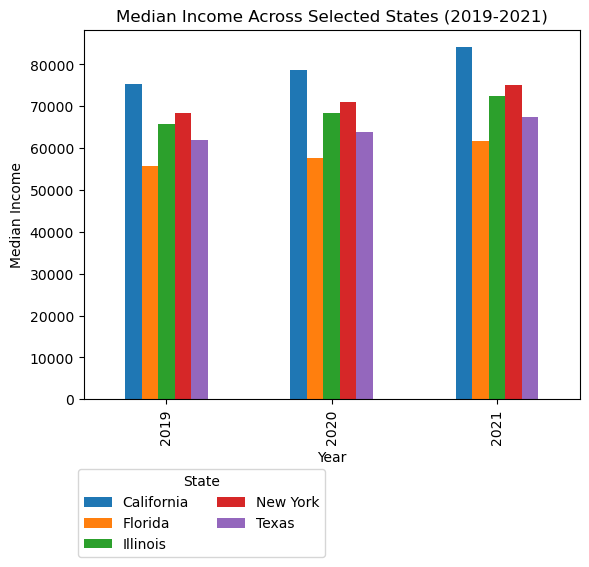

In [12]:
#Create a bar graph displaying Median Household income across 5 stated for the years 2019 - 2021
sample_data = {    'Year': [2019, 2020, 2021],
    'California': [75235, 78672, 84097],
    'Florida': [55660, 57703, 61777],
    'Illinois': [65886, 68428, 72563],
    'New York': [68486, 71117, 75157],
    'Texas': [61874, 63826, 67321]
}

df = pd.DataFrame(sample_data)

# Set 'Year' column as index 
df.set_index('Year', inplace=True)

# Plot the bar graph
df.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Median Income')
plt.title('Median Income Across Selected States (2019-2021)')
plt.legend(title='State',bbox_to_anchor=(0.5, -0.17), loc='upper right', ncol=2)

# Save the chart as a .fig file
plt.savefig('output_data/bar_chart_12.png')

plt.show()


In [13]:
# List of states of interest
states_of_interest = ['California', 'Florida', 'Illinois','New York','Texas']
# Filter the data for the specified states
filtered_data = Income_Bracket_complete[Income_Bracket_complete['State Name'].isin(states_of_interest)].copy()
# Calculate income difference between 2020 and 2019
filtered_data['Income_Increase_2019_2020'] = filtered_data['Household Income 2020'] - filtered_data['Household Income 2019']
# Calculate income difference between 2021 and 2020
filtered_data['Income_Increase_2020_2021'] = filtered_data['Household Income 2021'] - filtered_data['Household Income 2020']

# Calculate cumulative income increase over the three years
filtered_data['Cumulative_Income_Increase'] = (
    filtered_data['Income_Increase_2019_2020'] +
    filtered_data['Income_Increase_2020_2021']
)


# Calculate cumulative income increase in percentage
filtered_data.loc[:, 'Cumulative_Income_Increase_Percentage'] = (
    (filtered_data['Cumulative_Income_Increase'] / filtered_data['Household Income 2019']) * 100
)

# Print the updated DataFrame
filtered_data.head()


,Unnamed: 0_x,State Name,Household Income 2020,state_x,Unnamed: 0_y,Household Income 2021,state_y,Household Income 2019,state,Income_Increase_2019_2020,Income_Increase_2020_2021,Cumulative_Income_Increase,Cumulative_Income_Increase_Percentage
4,1,California,78672.0,6,4,84097.0,6,75235.0,06,3437.0,5425.0,8862.0,11.779092
9,7,Florida,57703.0,12,9,61777.0,12,55660.0,12,2043.0,4074.0,6117.0,10.989939
13,22,Illinois,68428.0,17,13,72563.0,17,65886.0,17,2542.0,4135.0,6677.0,10.134171
32,4,New York,71117.0,36,32,75157.0,36,68486.0,36,2631.0,4040.0,6671.0,9.740677
43,24,Texas,63826.0,48,43,67321.0,48,61874.0,48,1952.0,3495.0,5447.0,8.803375
